In [7]:
%matplotlib inline 


import numpy as np #To use functions or constants that are in the NumPy module, type np.function_name. EG: np.pi is pi
import numpy.random as nprd #This imports random number generation functions
import scipy as sp #SciPy has lots of useful numerical methods, so we don't have to write them
import scipy.linalg as spla #This imports the sub-module containing linear algebra methods
import matplotlib.pyplot as plt #This will let us display images nicely
import cv2
#import pandas as pd 
from scipy import ndimage


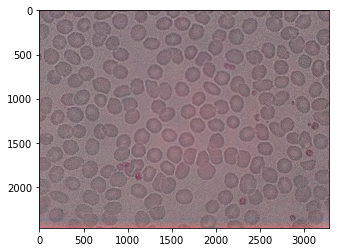

In [13]:
img = cv2.imread('H:\\dos\\Reading Courses\\Malaria Imaging\\me31F_300_a 26 SEPT 2018\\2_8.jpg')
plt.imshow(img)
plt.show()


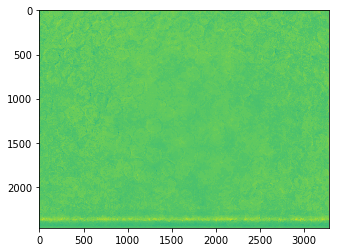

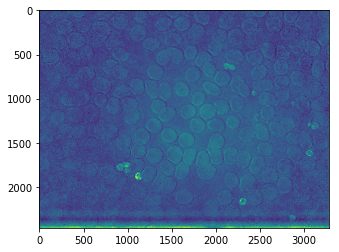

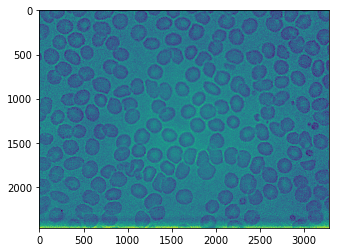

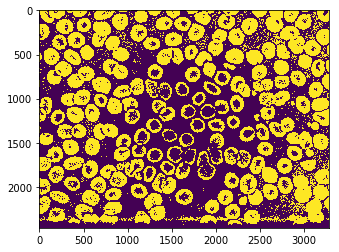

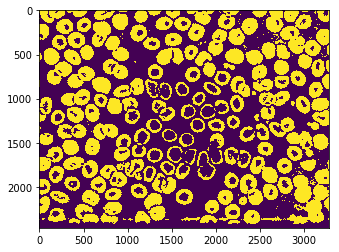

In [14]:
## Convert to HSV colour space 
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_h=img_hsv[:,:,0]
img_s=img_hsv[:,:,1]
img_v=img_hsv[:,:,2]

plt.imshow(img_h)
plt.show()
plt.imshow(img_s)
plt.show()
plt.imshow(img_v)
plt.show()

blur = cv2.GaussianBlur(img_v,(3,3),0)
ret_v,th_v = cv2.threshold(255-blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_v)
plt.show()

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
opening_v = cv2.morphologyEx(th_v, cv2.MORPH_OPEN, kernel1)
kernel2= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
closing_v = cv2.morphologyEx(opening_v, cv2.MORPH_CLOSE, kernel2)
plt.imshow(closing_v)
plt.show()


In [15]:
def hough(img): #Hough circle transform 
   
    try:
     
        img = cv2.medianBlur(img,7)
        circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=30,param2=15,minRadius=60,maxRadius=90)



        store=np.zeros(np.shape(circles[0,:])[0])+1
        for n in range(np.shape(store)[0]):
            i=circles[0,n]
            for j in range(n):
                if store[j]==1:
                    other=circles[0,j]
                    if (other[0]-i[0])**2+(other[1]-i[1])**2 < 100**2:
                        store[n]=0
        #                 print(other[0],i[0])
        #                 print(other[1],i[1])
        #                 print((other[0]-i[0]),(other[1]-i[1]) )
        #                 print((other[0]-i[0])**2,(other[1]-i[1])**2 )



        store=np.array(store, dtype=np.bool)
        circles2=circles[0,:]
        circles2= circles2[store,:]
        circles2 = np.uint16(np.around(circles2))


        return(circles2)
    except Exception:# NEED TO SORT THIS!!!!!!!!!!!!!!!!
        return()

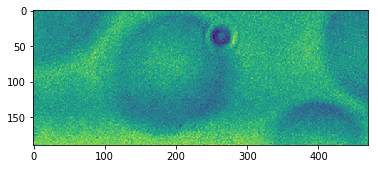

C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ushort_scalars
C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ushort_scalars


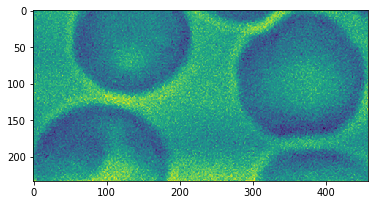

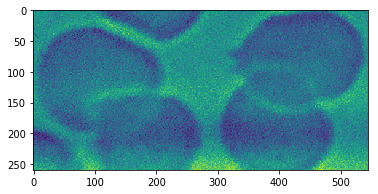

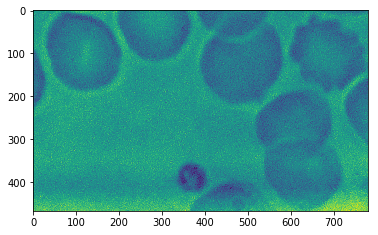

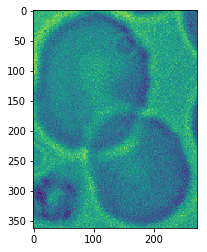

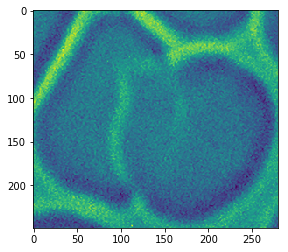

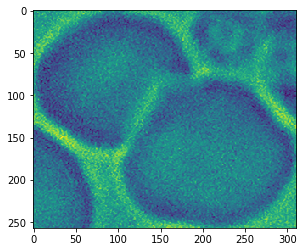

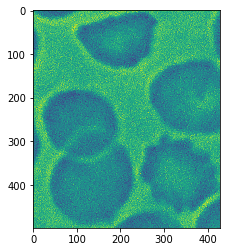

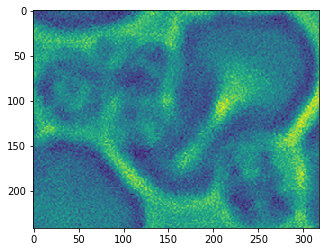

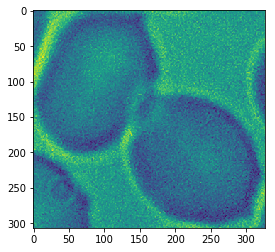

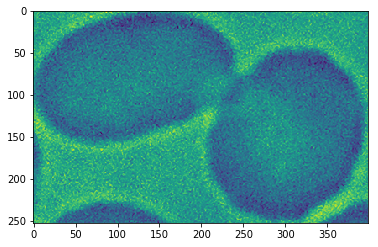

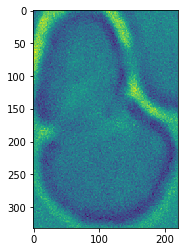

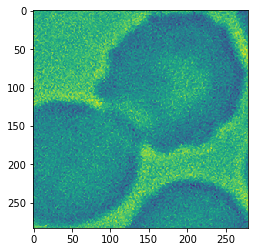

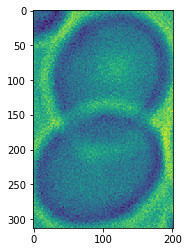

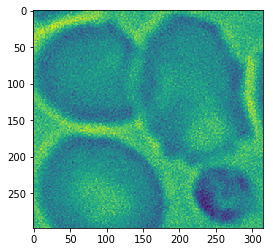

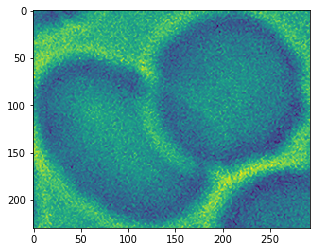

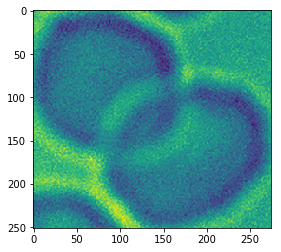

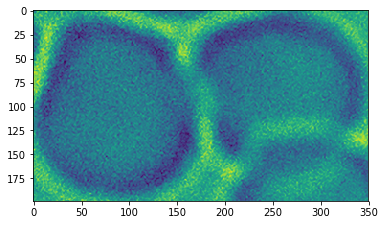

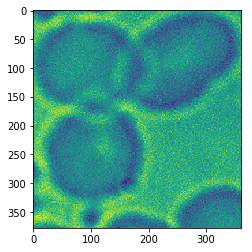

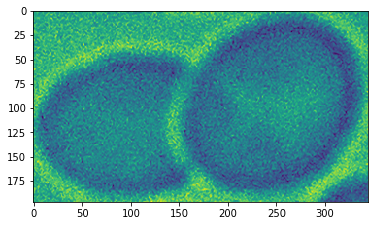

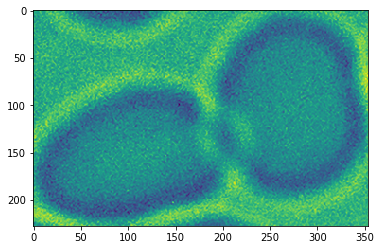

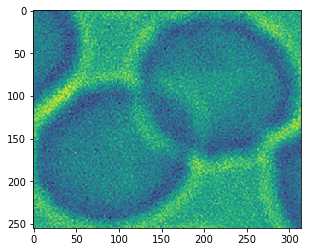

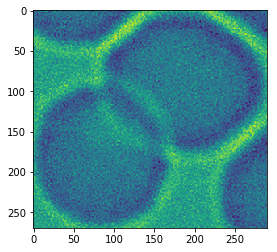

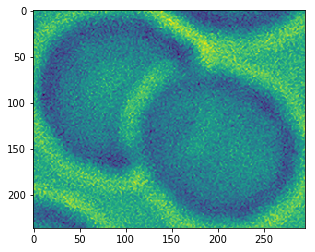

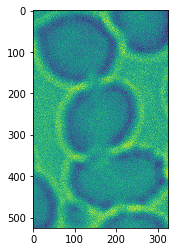

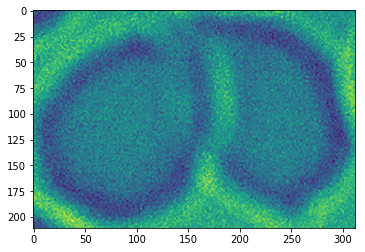

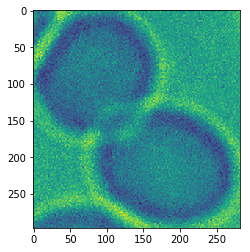

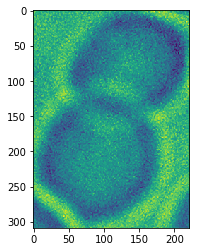

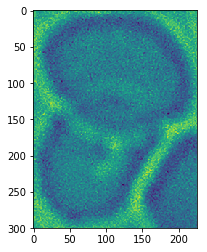

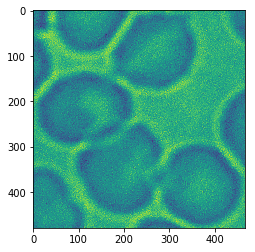

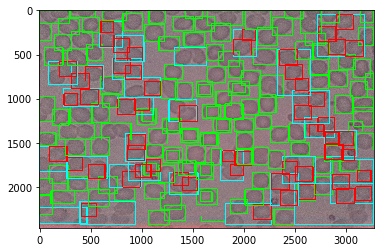

True

In [16]:
pictures = {}
number=0
def PolygonArea(corners):
    n = len(corners)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area


contours = cv2.findContours(th_v, 1, 2)
for i in range(np.shape(cv2.findContours(th_v, 1, 2)[1])[0]):
    cnt = contours[1][i]
    x,y,w,h = cv2.boundingRect(cnt)
    
    if 60000>w*h>12000:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
        img_new= img_v[int(y):int(y+h)+1,int(x):int(x+w)+1]
      #  cv2.imwrite ('H:\\dos\\Reading Courses\\Malaria Imaging\\cropped_images\\0_1_crop'+str(i)+'.tiff',  img_new)
        pictures[number] = img_new
        number=number+1
#         plt.imshow(img_new)
#         plt.show()
    elif w*h>60000:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),10)
        #print(x,y)
        img_new= img_v[int(y):int(y+h)+1,int(x):int(x+w)+1]
        #cv2.imwrite ('H:\\dos\\Reading Courses\\Malaria Imaging\\cropped_images\\0_1_crop'+str(i)+'.tiff',  img_new)
        #print(img_new)
        circles =hough(img_new)
        #print(circles)
        for j in range(np.shape(circles)[0]):
            x1=circles[j,0]-circles[j,2]
            y1=circles[j,1]-circles[j,2]
            h1=circles[j,2]*2
            w1=circles[j,2]*2
            #cv2.rectangle(img_new,np.array([int(x1),int(y1)]),np.array([int(x1+w),int(y1+h)]),255,10)
            cv2.rectangle(img,(int(x+x1),int(y+y1)),(int(x+x1+w1),int(y+y1+h1)),(255,0,0),10)
            img1=img_v[int(y+y1):int(y+y1+h1)+1,int(x+x1):int(x+x1+w1)+1]
            #print('here', img1)
            pictures[number] = img1
            number=number+1
            #             plt.imshow(img1)
#             plt.show()

#             u=np.uint16(np.around(circles[j,:]))
#             # draw the outer circle
#             cv2.circle(img_new,(u[0],u[1]),u[2],1,2)
#             # draw the center of the circle
#             cv2.circle(img_new,(u[0],u[1]),2,1,2)
        plt.imshow(img_new )
        plt.show()


plt.imshow(img,aspect='auto')
plt.show()
cv2.imwrite('H:\\dos\Reading Courses\\Malaria Imaging\\Example2.tiff',img)

In [17]:
pictures

{0: array([[148, 147, 138, ..., 138, 135, 137],
        [144, 141, 143, ..., 138, 136, 136],
        [137, 139, 140, ..., 137, 134, 136],
        ...,
        [146, 149, 147, ..., 132, 127, 125],
        [140, 140, 143, ..., 134, 124, 118],
        [152, 144, 143, ..., 131, 128, 121]], dtype=uint8),
 1: array([[146, 143, 141, ..., 132, 136, 136],
        [139, 138, 137, ..., 138, 140, 136],
        [139, 143, 145, ..., 140, 141, 137],
        ...,
        [154, 162, 165, ..., 165, 158, 155],
        [150, 156, 162, ..., 161, 161, 158],
        [154, 166, 164, ..., 150, 163, 169]], dtype=uint8),
 2: array([[145, 149, 143, ..., 136, 145, 145],
        [143, 145, 146, ..., 139, 147, 151],
        [143, 147, 144, ..., 142, 129, 136],
        ...,
        [144, 142, 146, ..., 154, 154, 158],
        [140, 141, 136, ..., 156, 152, 159],
        [142, 145, 145, ..., 158, 159, 161]], dtype=uint8),
 3: array([[129, 128, 129, ..., 145, 140, 138],
        [136, 128, 127, ..., 141, 140, 146],
    